### EL5206-1: Laboratorio de Inteligencia Computacional y Robótica
## Laboratorio 2: Procesamiento de Imágenes

Integrantes:

*   Leslie Cárdenas
*   Matías Guzmán

# Introducción

Este laboratorio tiene como objetivo implementar y analizar algoritmos simples de clasificación aplicados a células sanguíneas. Para lograrlo, primero se implementa un algoritmo de análisis de textura LBP (Local Binary Patterns). Posteriormente, se aplica este sobre un set de imágenes de células, de cada cual se extrae un vector de características de 1x2225. Luego, se comparan estos vectores con los obtenidos al aplicar LBP sobre el set de datos de prueba para analizar los resultados. Para medir que tan similares son entre ellos se utiliza una metrica de distancia punto a punto.

Junto con presentar el desarrollo, se realiza un análisis con los resultados obtenidos, para finalmente 


# Desarrollo

Este laboratorio se realiza utilizando el programa `python`, por lo que primero se importan las librerias útiles para el procesamiento y visualización de las imágenes.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Parte 1

Ahora corresponde confeccionar el algoritmo de análisis de textura LBP usando una matriz de 3x3.

In [4]:
# Calcula el valor del nuevo píxel a partir de la matriz de 3x3 ingresada
def calculo3x3(mat):
    n_pix = 0
    arr = []
    px = mat[1,1]
    mask = [128, 64, 32, 1, 0, 16, 2, 4, 8]

    # Compara el valor del píxel central con la matriz
    for i in range(3):
        for j in range(3):
            if mat[i, j] < px:
                arr.append(0)
            else:
                arr.append(1)

    # Pondera lo anterior por la máscara
    for k in range(len(arr)):
        n_pix += arr[k] * mask[k]
    return n_pix

# Entrega la imagen generada tras aplicar LBP a la entrante
def lbp(img):
    img_bn = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    emp = np.zeros(img_bn.shape)

    for i in range(1, img_bn.shape[0]-1):
        for j in range(1, img_bn.shape[1]-1):
            # A cada píxel se le aplica la función calculo3x3
            emp[i ,j] = calculo3x3(img_bn[i-1:i+2, j-1:j+2])
    
    # Extiende los valores de los bordes para cubrir los 0
    emp[0,:] = emp[1,:]
    emp[img_bn.shape[0]-1,:] = emp[img_bn.shape[0]-2,:]
    emp[:,0] = emp[:,1]
    emp[:, img_bn.shape[1]-1] = emp[:, img_bn.shape[1]-2]
    return emp

Ahora, se procede a aplicar lo anterior a todas las imágenes de `cell_test` y `cell_gal`.

In [5]:
cell_test_LBP = []
cell_test = []
for i in range(1,9):
    img = cv2.imread(f"cell_test/I{i}_test.jpg")
    cell_test.append(img)
    img = lbp(img)
    cell_test_LBP.append(img)

In [10]:
cell_gal_LBP = []
cell_gal = []
for i in range(1,9):
    img = cv2.imread(f"cell_gal/I{i}_gal.jpg")
    cell_gal.append(img)
    img = lbp(img)
    cell_gal_LBP.append(img)

Se muestran las del conjunto `cell_test` para observar el efecto que tiene el aplicar la función `LBP`.

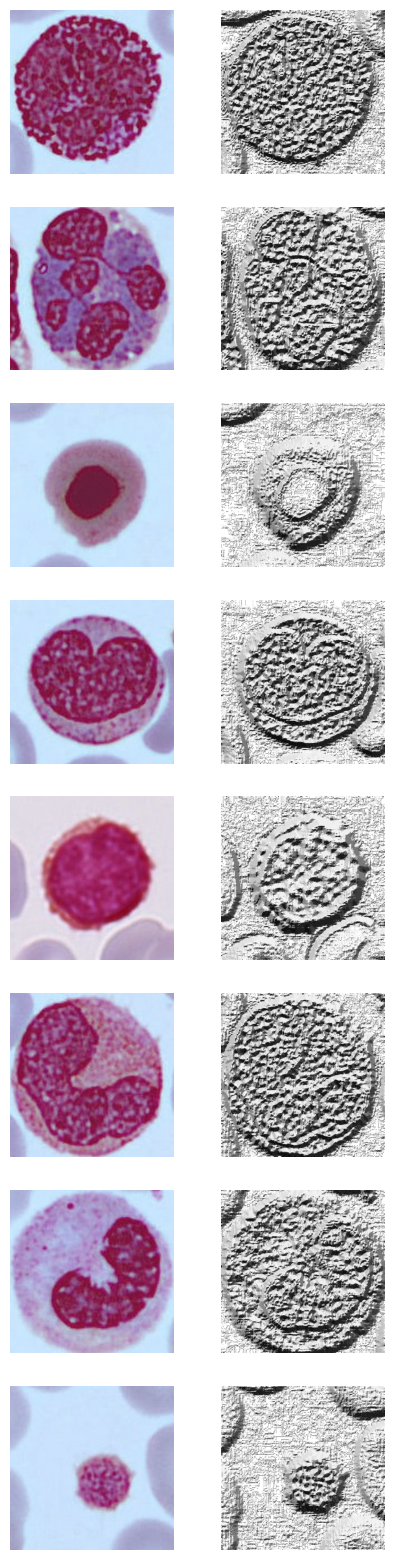

In [8]:
fig, axs = plt.subplots(8, 2, figsize =(5, 20))

for i in range(8):
    axs[i, 0].imshow(cell_test[i])
    axs[i, 0].axis("off")
    axs[i, 1].imshow(cell_test_LBP[i], cmap="gray")
    axs[i, 1].axis("off")

Las imagenes con LBP permiten que cada pixel contenga información de su vecindad inmediata. Además, el algoritmo pareciera que resalta los bordes de las imágenes. Esto último tiene bastante sentido teniendo en cuenta como está hecho el cálculo de cada pixel.

# Parte 2



Se implementa la función `hist` que se encarga de generar un vector de características de cada imágen LBP. Se segmenta cada imagen de 500x500 en 25 bloques de 100x100 pixeles, a cada bloque se le calcula un histograma de 89 puntos y luego se concatenan sus valores. Esta concatenación entrega el antes mencionado vector de características, el cual será utilizado por la Parte 3.

In [11]:
def hist(img):
    caract = []
    for i in range(5):
        for j in range(5):
            img_100 = img[i*100:(i+1)*100,j*100:(j+1)*100]
            histogram, _ = np.histogram(img_100, bins=89, range = (0,255))
            caract.append(histogram)
    return np.reshape(caract, (1,-1))[0]

# Parte 3

Se implementa la función `dist_vect` según las instrucciones del enunciado, la cual cumple con entregar un entero correspondiente a     que tan diferente son los valores de los vectores ingresados. Cuanto mayor sea el valor final, más discrepancia hay entre los vectores, es decir, menos se parecen.

In [12]:
def dist_vect(v1, v2):
    d = 0
    for i in range(len(v1)):
        d+= abs(v1[i]-v2[i])
    return d

# Parte 4

En esta parte se aplican los métodos de las Parte 2 y 3 sobre las imágenes `cell_gal` de la Parte 1. Esto entrega los vectores de característica de las imágenes, los que se almacenan en `gal_caract.npy`.

In [14]:
gal_caract=[]
for i in range(len(cell_gal_LBP)):
    img_lbp = cell_gal_LBP[i]
    v = hist(img_lbp)
    gal_caract.append(v)
np.save('gal_caract.npy', gal_caract)


# Parte 5

Se repite lo de la Parte 4 pero ahora sobre el conjunto `cell_test`, guardando los resultados en `test_caract.npy`.

In [18]:
test_caract=[]
for i in range(len(cell_test_LBP)):
    img_lbp = cell_test_LBP[i]
    v = hist(img_lbp)
    test_caract.append(v)
np.save('test_caract.npy', test_caract)

Posteriormente, comparamos los vectores de cada una de las imágenes de `cell_test` con todas las de `cell_gal`. Se muestra la diferencia o error generado por la función `dist_vect` para cada caso.

In [21]:
errores = np.zeros((8,8))
for i in range(len(cell_test_LBP)):
    print('Para imagen I'+str(i+1)+'_test:')
    for j in range(len(cell_gal_LBP)):
        v_test = test_caract[i]
        v_gal = gal_caract[j]
        d = dist_vect(v_test, v_gal)
        errores[i,j] = d
        print('\tComparado con I'+str(j+1)+'_gal: '+str(d))


Para imagen I1_test:
	Comparado con I1_gal: 82780
	Comparado con I2_gal: 93114
	Comparado con I3_gal: 183056
	Comparado con I4_gal: 98364
	Comparado con I5_gal: 153226
	Comparado con I6_gal: 94664
	Comparado con I7_gal: 92830
	Comparado con I8_gal: 192964
Para imagen I2_test:
	Comparado con I1_gal: 105710
	Comparado con I2_gal: 41124
	Comparado con I3_gal: 195950
	Comparado con I4_gal: 88026
	Comparado con I5_gal: 155930
	Comparado con I6_gal: 87740
	Comparado con I7_gal: 92926
	Comparado con I8_gal: 202216
Para imagen I3_test:
	Comparado con I1_gal: 193190
	Comparado con I2_gal: 225750
	Comparado con I3_gal: 95248
	Comparado con I4_gal: 209236
	Comparado con I5_gal: 138014
	Comparado con I6_gal: 198624
	Comparado con I7_gal: 218394
	Comparado con I8_gal: 155438
Para imagen I4_test:
	Comparado con I1_gal: 106442
	Comparado con I2_gal: 113594
	Comparado con I3_gal: 153374
	Comparado con I4_gal: 106014
	Comparado con I5_gal: 124538
	Comparado con I6_gal: 102074
	Comparado con I7_gal: 118

Los errores estan guardados en la matriz `errores`. Nuestro criterio para identificar cual par de imágenes son parecidas, es identificar el valor de error más bajo.

In [22]:
for i in range(errores.shape[0]):
    minposition = errores[i, :].argmin()
    print("La imagen I" + str(i+1) + "_test, corresponde con la imagen I" + str(minposition+1) + "_gal. Error: " + str(errores[i,minposition]))


La imagen I1_test, corresponde con la imagen I1_gal. Error: 82780.0
La imagen I2_test, corresponde con la imagen I2_gal. Error: 41124.0
La imagen I3_test, corresponde con la imagen I3_gal. Error: 95248.0
La imagen I4_test, corresponde con la imagen I6_gal. Error: 102074.0
La imagen I5_test, corresponde con la imagen I5_gal. Error: 108054.0
La imagen I6_test, corresponde con la imagen I6_gal. Error: 76632.0
La imagen I7_test, corresponde con la imagen I7_gal. Error: 86138.0
La imagen I8_test, corresponde con la imagen I8_gal. Error: 144400.0


Así, se obtiene que, para casi todos los casos, el método generado es suficiente para identificar cual es más similar o a cual corresponde a cada imagen de test. El único caso en que se falla es para `I4_test`, donde la más similar según el procedimiento realizado es `I6_gal`, pero se esperaba que fuera `I4_gal`. Ahora, se observamos los errores de la imagen en cuestión, se puede notar que la diferencia entre el error que entrega sobre I6 es solo 3940 menos que en I4, lo que es mínimo. De la misma forma, la siguiente imagne con más similitud a `I4_test` es `I1_gal` tan solo con 428 más que `I4_gal`. Nuevamente, está diferencia numérica tan pequeña demuestra que el método tal vez no debería ser utilizado para determinar a cual ser parece más, si no a que a cuales, generando una dsitribución de probabilidad o algo similar.

# Parte 6



Si se tiene como entrada una imagen que no pertenecía a la base de datos, es de esperar que al calcularle la distancia de su vector de características con cualquier vector de esta base, siempre obtengamos valores muy altos (distancias grandes). Por lo tanto, podemos hacer una función que detecte la imagen impostora en base a lo anterior.